In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [319]:
company=pd.read_csv('Company Stock and Investment.csv')
company.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [320]:
company.drop(['Gold Investments', 'Comp Stock', 'Other sharesInvestments'], axis=1, inplace=True)

In [321]:
company.head()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256


In [322]:
df=pd.DataFrame(data=company)

In [323]:
df.head()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256


In [324]:
df.isnull().sum()

Date               0
Oil Investments    0
dtype: int64

In [325]:
df['Date'] = pd.to_datetime(df['Date'])

In [326]:
df.set_index('Date',inplace=True)
df.head()

,Oil Investments
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256


In [327]:
df.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


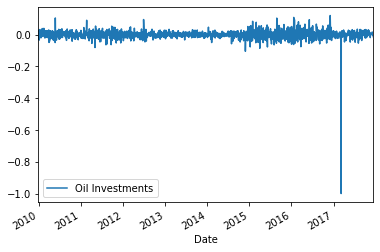

In [328]:
df.plot()

In [329]:
from statsmodels.tsa.stattools import adfuller

In [330]:
test_result=adfuller(df['Oil Investments'])

In [331]:
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-45.94216292983992, 0.0, 0, 1983, {'1%': -3.4336519592295947, '5%': -2.862998620943585, '10%': -2.567546508593341}, -8042.187722182893)


In [332]:
def adfuller_test(Oil_Investments):
    output=adfuller(Oil_Investments)
    labels=['ADF test Statistic', 'p-value', '#Lags Used', 'Number of observatio used']
    for value, label in zip(output, labels):
        print(label+ " : "+str(value))
    if output[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [333]:
adfuller_test(df['Oil Investments'])

ADF test Statistic : -45.94216292983992
p-value : 0.0
#Lags Used : 0
Number of observatio used : 1983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


As p value is less then .05 that is-- Stationary

Our Data is stationary data

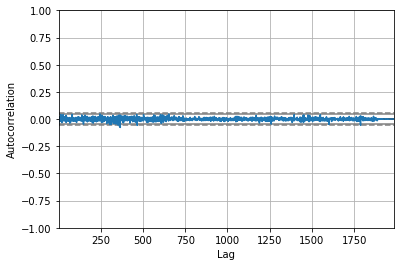

In [334]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Oil Investments'])
plt.show()

In [335]:
from statsmodels.tsa.arima_model import ARIMA

In [336]:
model=ARIMA(df['Oil Investments'],order=(0,1,0))
model_fit=model.fit()

In [337]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                 1983
Model:                 ARIMA(0, 1, 0)   Log Likelihood                3365.255
Method:                           css   S.D. of innovations              0.044
Date:                Thu, 22 Oct 2020   AIC                          -6726.511
Time:                        14:46:57   BIC                          -6715.326
Sample:                             1   HQIC                         -6722.402
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.635e-05      0.001     -0.016      0.987      -0.002       0.002
==============================================================================
"""

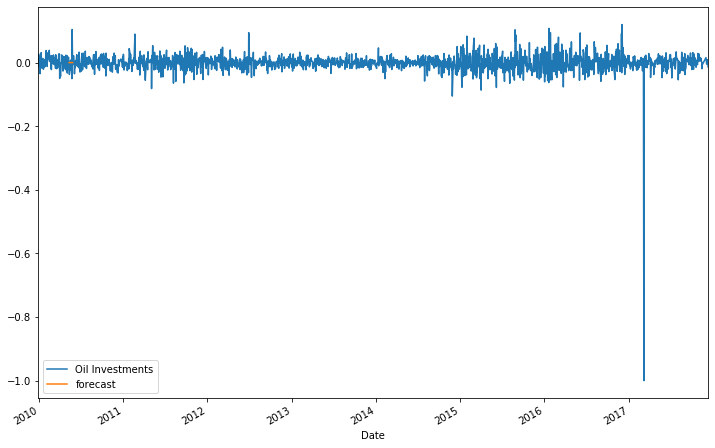

In [338]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Oil Investments','forecast']].plot(figsize=(12,8))

In [339]:
import statsmodels.api as sm

In [340]:
model=sm.tsa.SARIMAX(df['Oil Investments'],order=(0,1,0),seasonal_order=(0,1,0,12))
result=model.fit()

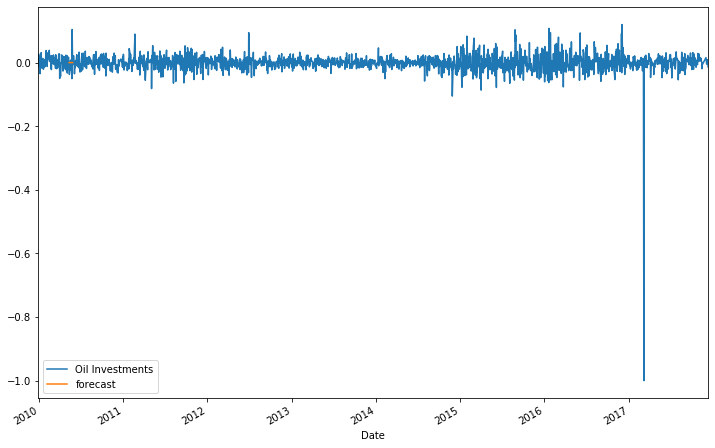

In [341]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Oil Investments','forecast']].plot(figsize=(12,8))

In [342]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36)]

In [343]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [344]:
future_df=pd.concat([df,future_datest_df])

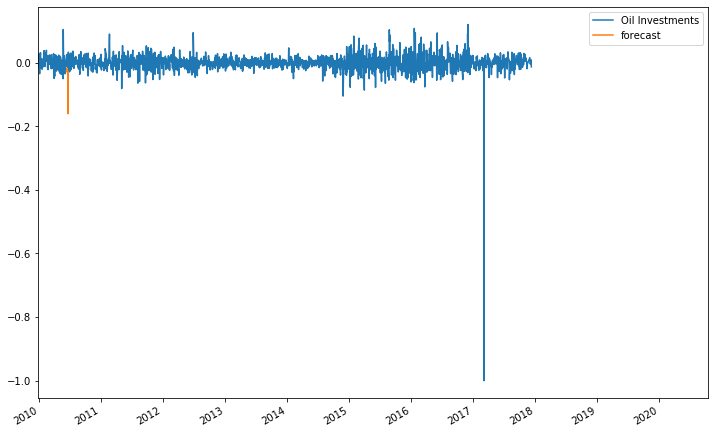

In [345]:
future_df['forecast']=results.predict(start=104,end=120,dynamic=True)
future_df[['Oil Investments','forecast']].plot(figsize=(12,8))

# 2- When We consider "Gold Investments" as Target column

In [346]:
df=pd.read_csv('Company Stock and Investment.csv')
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [347]:
df.drop(['Oil Investments', 'Comp Stock', 'Other sharesInvestments'], axis=1, inplace=True)

In [348]:
df.head()

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221


In [349]:
df['Date']=pd.to_datetime(df['Date'])

In [350]:
df.head()

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221


In [351]:
df.set_index('Date',inplace=True)

In [352]:
df.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221


In [353]:
df.isnull().sum()

Gold Investments    0
dtype: int64

In [354]:
df.describe()

,Gold Investments
count,1984.000000
mean,-0.020152
std,0.140965
min,-1.000000
25%,-0.005881
50%,0.000000
75%,0.005454
max,0.049577


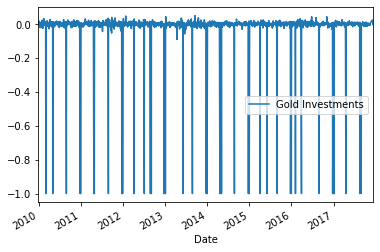

In [355]:
df.plot()

In [356]:
from statsmodels.tsa.stattools import adfuller

In [357]:
def adfuller_test(Gold_Investments):
    output=adfuller(Gold_Investments)
    labels=['ADF test Statistic', 'p-value', '#Lags Used', 'Number of observatio used']
    for value, label in zip(output, labels):
        print(label+ " : "+str(value))
    if output[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [358]:
adfuller_test(df['Gold Investments'])

ADF test Statistic : -15.906853851669053
p-value : 8.208405770368892e-29
#Lags Used : 7
Number of observatio used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


Data is stationary data because p-value is less than 0.05

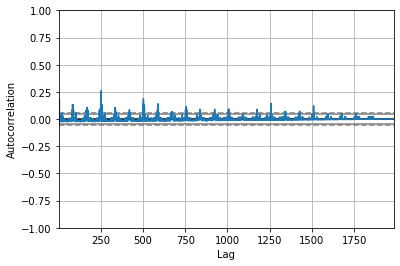

In [359]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Gold Investments'])
plt.show()

In [360]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

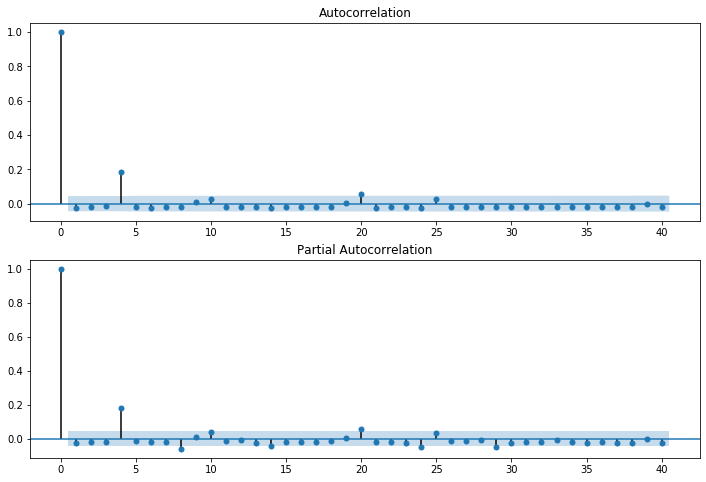

In [361]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Gold Investments'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Gold Investments'].iloc[13:],lags=40,ax=ax2)

In [362]:
from statsmodels.tsa.arima_model import ARIMA

In [363]:
model = ARIMA(df['Gold Investments'],order=(1,1,1))
model_fit=model.fit()

In [364]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Gold Investments   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1067.368
Method:                       css-mle   S.D. of innovations              0.141
Date:                Thu, 22 Oct 2020   AIC                          -2126.737
Time:                        14:48:36   BIC                          -2104.367
Sample:                             1   HQIC                         -2118.519
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1.571e-06   8.43e-06     -0.186      0.852   -1.81e-05     1.5e-05
ar.L1.D.Gold Investments    -0.0213      0.022     -0.949      0.342      -0.065       0.023
ma.L1.D.Gold Investments    -0.9981      0.003   -321.154      0.000      -1.004      -0.992
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -46.9101           +0.0000j           46.9101            0.5000
MA.1            1.0019           +0.0000j            1.0019            0.0000
-----------------------------------------------------------------------------
"""

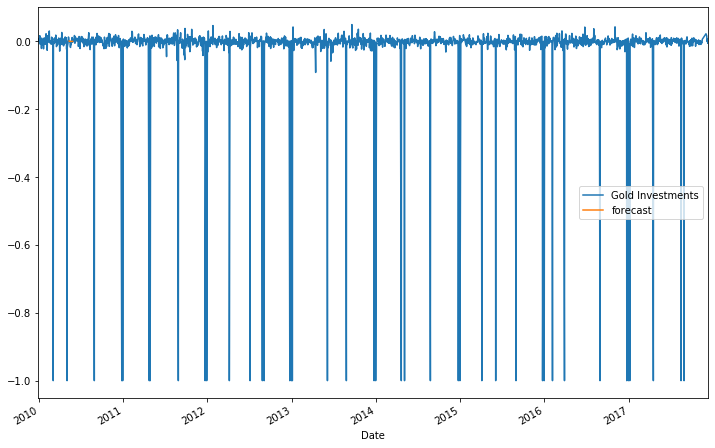

In [365]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Gold Investments','forecast']].plot(figsize=(12,8))

In [366]:
model=sm.tsa.statespace.SARIMAX(df['Gold Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

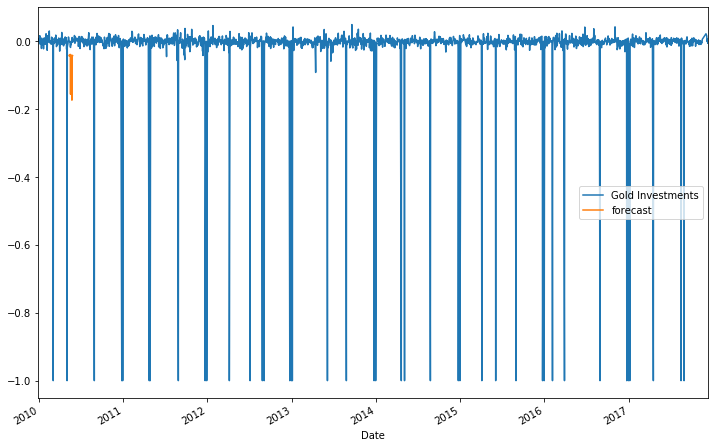

In [367]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Gold Investments','forecast']].plot(figsize=(12,8))

In [368]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36)]

In [369]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [370]:
future_datest_df.head()

,Gold Investments,forecast
2017-12-15,NaN,NaN
2018-01-15,NaN,NaN
2018-02-15,NaN,NaN
2018-03-15,NaN,NaN
2018-04-15,NaN,NaN


In [371]:
future_df=pd.concat([df,future_datest_df])

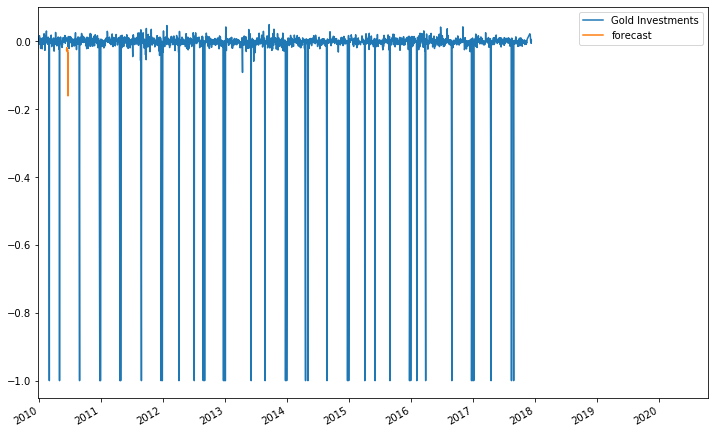

In [372]:
future_df['forecast']=results.predict(start=104,end=120,dynamic=True)
future_df[['Gold Investments','forecast']].plot(figsize=(12,8))

# 3- When we consider "comp stock" column as target column

In [373]:
df=pd.read_csv('Company Stock and Investment.csv')
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [374]:
df.drop(['Oil Investments', 'Gold Investments', 'Other sharesInvestments'],axis=1,inplace=True)

In [375]:
df.head()

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849


In [376]:
df['Date']=pd.to_datetime(df['Date'])

In [377]:
df.head()

,Date,Comp Stock
0,2009-12-31,0.017354
1,2010-04-01,0.015565
2,2010-05-01,0.001729
3,2010-06-01,-0.015906
4,2010-07-01,-0.001849


In [378]:
df.set_index('Date',inplace=True)

In [379]:
df.head()

,Comp Stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849


In [380]:
df.isnull().sum()

Comp Stock    0
dtype: int64

In [381]:
df.describe()

,Comp Stock
count,1984.000000
mean,0.001007
std,0.016017
min,-0.123558
25%,-0.006926
50%,0.000876
75%,0.009708
max,0.088741


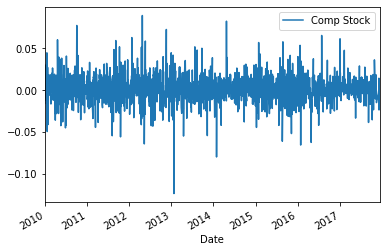

In [382]:
df.plot()

In [383]:
from statsmodels.tsa.stattools import adfuller

In [384]:
def adfuller_test(Comp_Stock):
    output=adfuller(Comp_Stock) 
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(output,labels):
        print(label+' : '+str(value) )
    if output[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")


In [385]:
adfuller_test(df['Comp Stock'])

ADF Test Statistic : -12.473386265908339
p-value : 3.207774293088362e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


This data is also stationary data because p-value is less than 0.05

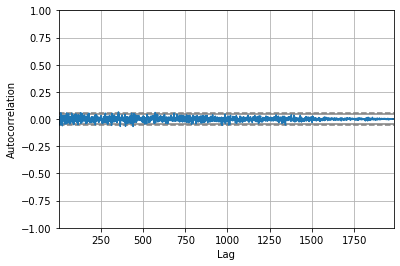

In [386]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Comp Stock'])
plt.show()

In [387]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

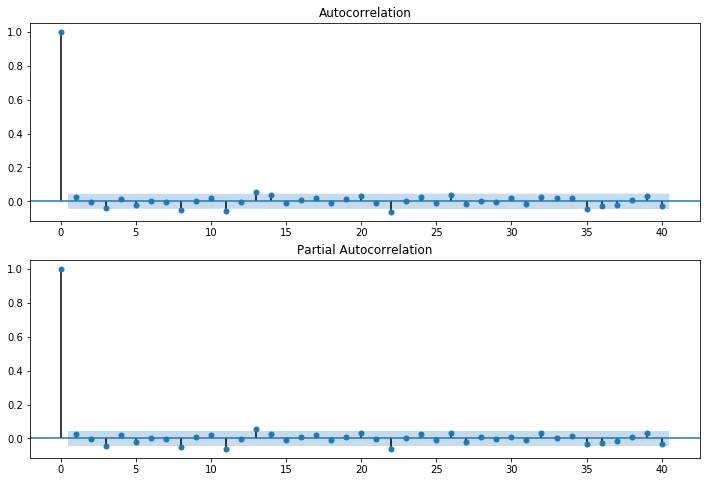

In [388]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Comp Stock'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Comp Stock'].iloc[13:],lags=40,ax=ax2)

In [389]:
from statsmodels.tsa.arima_model import ARIMA

In [390]:
model=ARIMA(df['Comp Stock'],order=(1,1,1))
model_fit=model.fit()

In [391]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1983
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5373.983
Method:                       css-mle   S.D. of innovations              0.016
Date:                Thu, 22 Oct 2020   AIC                         -10739.966
Time:                        14:51:40   BIC                         -10717.597
Sample:                             1   HQIC                        -10731.749
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.078e-08    6.5e-06     -0.014      0.989   -1.28e-05    1.26e-05
ar.L1.D.Comp Stock     0.0284      0.023      1.217      0.224      -0.017       0.074
ma.L1.D.Comp Stock    -0.9831      0.013    -73.360      0.000      -1.009      -0.957
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           35.2594           +0.0000j           35.2594            0.0000
MA.1            1.0172           +0.0000j            1.0172            0.0000
-----------------------------------------------------------------------------
"""

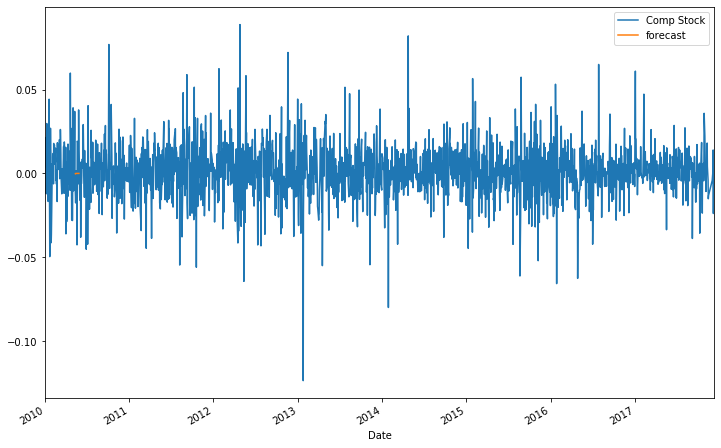

In [392]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Comp Stock','forecast']].plot(figsize=(12,8))

In [393]:
import statsmodels.api as sm

In [394]:
model=sm.tsa.statespace.SARIMAX(df['Comp Stock'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

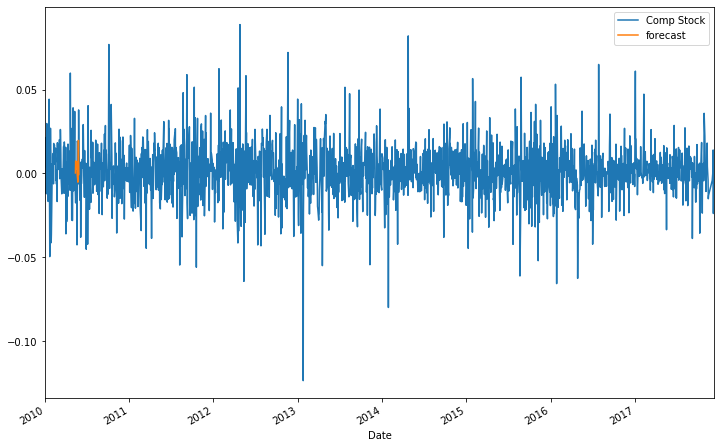

In [395]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Comp Stock','forecast']].plot(figsize=(12,8))

In [396]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36)]

In [397]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [398]:
future_datest_df.tail()

,Comp Stock,forecast
2020-06-15,NaN,NaN
2020-07-15,NaN,NaN
2020-08-15,NaN,NaN
2020-09-15,NaN,NaN
2020-10-15,NaN,NaN


In [399]:
future_df=pd.concat([df,future_datest_df])

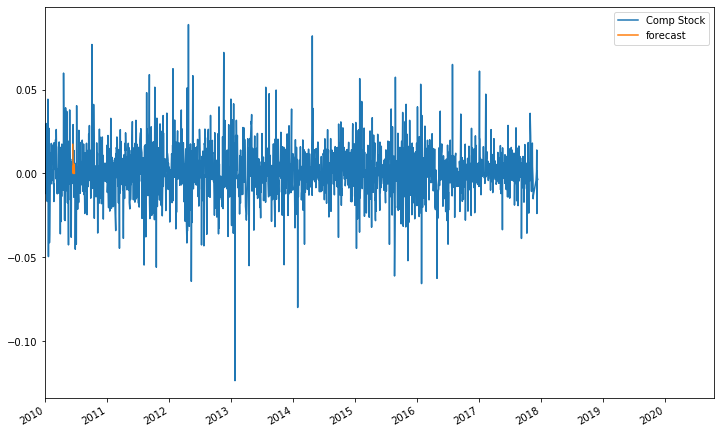

In [400]:
future_df['forecast']=results.predict(start=104,end=120,dynamic=True)
future_df[['Comp Stock','forecast']].plot(figsize=(12,8))